In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione ecdf() per la CDF (from previous)     ------ >     ECDF- Empirical cumulative distributed function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# PDF ----> Probability Distribution(Density) Function / Distribuzione di probabilità

# CDF ----> Cumulative Distribution(Density) Function / Funzione di ripartizione

Normal PDF ----> Simmetrica e con un solo peak rappresentato dalla mean

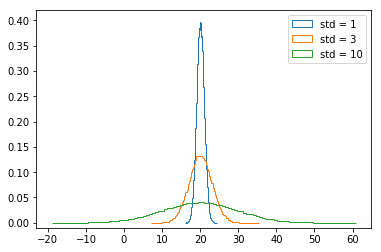


Now let's have a look at the CDF:



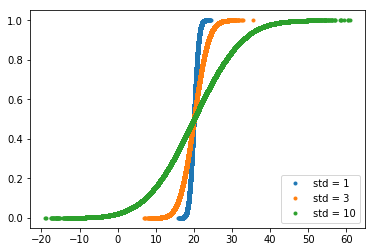



The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.


In [12]:
# The Normal PDF

# Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. 
# Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. 
# Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Plot a histograms of each of the samples; 
# for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. 
# The latter keyword argument makes the plot look much like the smooth theoretical PDF. 
# You will need to make 3 plt.hist() calls.
# Make histograms
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

# You can see how the different standard deviations result in PDFs of different widths. 
# The peaks are all centered at the mean of 20.

print("\nNow let's have a look at the CDF:\n")

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

print("\n\nThe CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.")


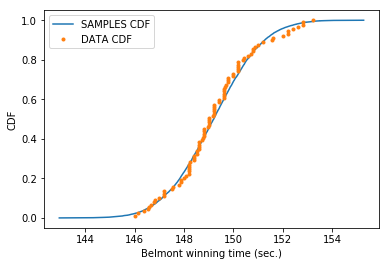

In [16]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, 
# assigning the results to x_theor, y_theor and x, y, respectively.
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.legend(('SAMPLES CDF', 'DATA CDF'))
plt.show()


In [20]:
"""
What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), 
what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?
"""

print("mu=", mu)
print("sigma=", sigma)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('\nProbability of besting Secretariat:', prob)

prob2 = np.sum(samples > 144) / len(samples)
print('Opposite Probability:', prob2)

mu= 149.22101123595507
sigma= 1.6186456017743405

Probability of besting Secretariat: 0.000642
Opposite Probability: 0.999358


# Exponential distribution

The Exponential distribution describes the waiting times between rare events

If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it.

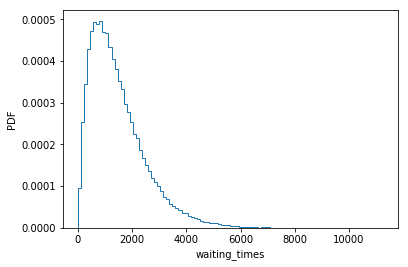


Adesso le CDF:


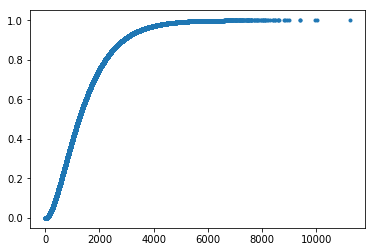

In [25]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density=True, histtype='step')


# Label axes
plt.xlabel('waiting_times')
plt.ylabel('PDF')


# Show the plot
plt.show()

print("\nAdesso le CDF:")

# Generate CDFs
x_exp, y_exp = ecdf(waiting_times)

# Plot CDFs
_ = plt.plot(x_exp, y_exp, marker='.', linestyle='none')

plt.show()


Perfect!!! Now you have to learn to perform the two key tasks in statistical inference: parameter estimation and hypothesis testing.